In [1]:
import pandas as pd
import numpy as np



C:\Users\Taewan\AppData\Local\Temp\ipykernel_9504\2504811429.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#초기 실행
#!pip3 install git+https://github.com/ourownstory/neural_prophet.git#egg=neuralprophet

In [2]:
import neuralprophet

In [5]:
import pandas as pd
df=pd.read_csv("index.csv")
df=df.iloc[:,1:]


In [6]:
df

,time,Open,High,Low,Close,Volume,returns,volatility,taker/maker_ratio,taker-maker_diffsum,...,TRIX,%K,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv_d,rv_w
0,2023-01-04 00:00:00,16667.3,16668.4,16645.7,16655.6,4299.783,-0.000696,0.001456,0.861135,-2.211825e+07,...,3.507949e-05,37.547893,43.528752,-55.0,2.5,-18.965,7.704,-2216.187714,3.026353e-08,0.000002
1,2023-01-04 01:00:00,16655.6,16730.0,16652.3,16696.1,14283.553,0.002432,0.001448,1.208955,4.494365e+05,...,2.282795e-05,61.079219,45.158317,-55.0,25.3,-9.770,7.858,7445.095193,4.843850e-07,0.000002
2,2023-01-04 02:00:00,16696.1,16749.8,16695.5,16729.0,10777.263,0.001971,0.001518,1.258681,2.109458e+07,...,-1.985936e-07,80.542563,49.453631,-55.0,111.7,3.810,6.252,6529.870215,5.912750e-06,0.000002
3,2023-01-04 03:00:00,16729.1,16870.0,16729.0,16855.9,40719.495,0.007586,0.002273,1.230562,9.185839e+07,...,-6.791250e-05,93.713776,53.227764,50.0,229.9,34.330,-4.774,36618.666426,3.882949e-06,0.000002
4,2023-01-04 04:00:00,16855.9,16904.4,16841.0,16852.4,20900.843,-0.000208,0.002261,0.851541,6.359019e+07,...,-1.233662e-04,79.899497,57.846384,55.0,214.7,64.250,-18.258,-1153.832027,5.754178e-05,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,2024-01-27 19:00:00,41785.0,41977.0,41775.1,41896.4,7765.565,0.002668,0.002019,1.363879,-1.798520e+10,...,-6.512821e-04,69.481257,55.875081,50.0,240.0,57.270,62.924,4284.714913,2.410958e-06,0.000011
9332,2024-01-27 20:00:00,41896.5,42070.0,41896.4,42049.6,5408.243,0.003657,0.002154,1.180081,-1.796644e+10,...,-6.599194e-04,94.052478,61.847046,55.0,318.0,93.870,39.618,4769.596793,2.410958e-06,0.000011
9333,2024-01-27 21:00:00,42049.6,42165.6,42001.8,42137.8,5859.277,0.002098,0.002189,1.183708,-1.794570e+10,...,-6.763848e-04,93.661651,65.916870,60.0,393.1,146.945,9.018,3154.995308,2.410958e-06,0.000011
9334,2024-01-27 22:00:00,42137.8,42187.1,42057.6,42135.3,5271.863,-0.000059,0.002191,0.885899,-1.795913e+10,...,-6.855390e-04,88.741578,71.432007,65.0,404.7,204.470,-17.330,-101.773417,2.410958e-06,0.000011


In [7]:
#train test split
cutoff = "2023-09-31"
train_df = df[df['time']<cutoff]
test_df = df[df['time']>=cutoff]

In [8]:
train_df

,time,Open,High,Low,Close,Volume,returns,volatility,taker/maker_ratio,taker-maker_diffsum,...,TRIX,%K,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv_d,rv_w
0,2023-01-04 00:00:00,16667.3,16668.4,16645.7,16655.6,4299.783,-0.000696,0.001456,0.861135,-2.211825e+07,...,3.507949e-05,37.547893,43.528752,-55.0,2.5,-18.965,7.704,-2216.187714,3.026353e-08,1.930215e-06
1,2023-01-04 01:00:00,16655.6,16730.0,16652.3,16696.1,14283.553,0.002432,0.001448,1.208955,4.494365e+05,...,2.282795e-05,61.079219,45.158317,-55.0,25.3,-9.770,7.858,7445.095193,4.843850e-07,1.848002e-06
2,2023-01-04 02:00:00,16696.1,16749.8,16695.5,16729.0,10777.263,0.001971,0.001518,1.258681,2.109458e+07,...,-1.985936e-07,80.542563,49.453631,-55.0,111.7,3.810,6.252,6529.870215,5.912750e-06,1.815058e-06
3,2023-01-04 03:00:00,16729.1,16870.0,16729.0,16855.9,40719.495,0.007586,0.002273,1.230562,9.185839e+07,...,-6.791250e-05,93.713776,53.227764,50.0,229.9,34.330,-4.774,36618.666426,3.882949e-06,2.069630e-06
4,2023-01-04 04:00:00,16855.9,16904.4,16841.0,16852.4,20900.843,-0.000208,0.002261,0.851541,6.359019e+07,...,-1.233662e-04,79.899497,57.846384,55.0,214.7,64.250,-18.258,-1153.832027,5.754178e-05,2.187740e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,2023-09-30 19:00:00,26992.3,27026.7,26972.8,27011.2,2369.602,0.000700,0.000816,1.061747,-1.119546e+10,...,-1.378275e-04,41.889764,52.411771,80.0,73.8,56.970,34.378,830.899403,2.498926e-07,6.992708e-07
6476,2023-09-30 20:00:00,27011.2,27061.6,27011.1,27049.0,3577.599,0.001399,0.000832,1.079573,-1.119176e+10,...,-1.506590e-04,87.837838,54.626362,65.0,82.8,63.180,30.124,2677.885984,4.902796e-07,7.088092e-07
6477,2023-09-30 21:00:00,27049.0,27070.4,26929.8,26984.0,5545.786,-0.002403,0.000949,0.637115,-1.122496e+10,...,-1.451190e-04,38.549075,53.617292,65.0,59.7,53.660,41.574,-2563.841323,1.958375e-06,7.171541e-07
6478,2023-09-30 22:00:00,26984.0,27021.6,26968.0,26996.4,3202.577,0.000460,0.000947,1.136357,-1.121944e+10,...,-1.424436e-04,47.368421,54.220756,65.0,82.2,46.810,44.598,740.894679,5.774632e-06,7.094860e-07


In [9]:
import os

log_dir = "c:\\Users\\Taewan\\Desktop\\BDA 비트코인 변동성예측\\data\\lightning_logs"
os.makedirs(log_dir, exist_ok=True)

In [12]:
#hyperparameter search
from neuralprophet import NeuralProphet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error

#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["time"], "y": train_df["volatility"]})
test = pd.DataFrame({"ds": test_df["time"], "y": test_df["volatility"]})

# Hyperparameter grid search
param_grid = {
    'yearly_seasonality': ["auto"],
    'weekly_seasonality': [True],
    'daily_seasonality': [True],
    'seasonality_mode': ["additive","multiplicative"],
}

best_mae = float('inf')
best_params = None

# 모든 조합에 대해 모델 학습 및 평가
for params in ParameterGrid(param_grid):
    model = NeuralProphet(**params)
    model.fit(train, freq='h')
    
    # 테스트 데이터에 대한 예측
    future = model.make_future_dataframe(train, periods=len(test_df))
    forecast = model.predict(future)
    
    # 평가 메트릭 계산 (이 예시에서는 MAPE 사용)
    mae = mean_absolute_percentage_error(test_df['volatility'], forecast['yhat1'][:len(test_df)])
    
    # 현재까지 최고 성능보다 더 좋은지 확인하고 업데이트
    if mae < best_mae:
        best_mae = mae
        best_params = params

print("Best MAE:", best_mae)
print("Best Parameters:", best_params)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.985% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\

Finding best initial lr:   0%|          | 0/245 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.985% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 102it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.985% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int

Finding best initial lr:   0%|          | 0/245 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.985% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

Predicting: 102it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Best MAE: 0.30930746752820754
Best Parameters: {'daily_seasonality': True, 'seasonality_mode': 'additive', 'weekly_seasonality': True, 'yearly_seasonality': 'auto'}


In [13]:
from neuralprophet import NeuralProphet

# NeuralProphet 모델 초기화
model = NeuralProphet(
    yearly_seasonality="auto",
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive',
)

#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["time"], "y": train_df["volatility"]})
test = pd.DataFrame({"ds": test_df["time"], "y": test_df["volatility"]})

# 모델 학습
model.fit(train,freq='h')


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.985% of the data.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphe

Finding best initial lr:   0%|          | 0/245 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,0.009582,0.011455,0.704120,0.0,0
1,0.006135,0.007565,0.391779,0.0,1
2,0.004843,0.006087,0.284528,0.0,2
3,0.003944,0.005136,0.216412,0.0,3
4,0.003091,0.004175,0.156732,0.0,4
...,...,...,...,...,...
110,0.001336,0.002044,0.052730,0.0,110
111,0.001333,0.002038,0.052286,0.0,111
112,0.001335,0.002023,0.052320,0.0,112
113,0.001333,0.002032,0.052177,0.0,113


In [14]:
# 예측을 위한 데이터 프레임 생성
future = model.make_future_dataframe(train, periods=len(test_df))

# 예측
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.985% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be re

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.965% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neur

Predicting: 102it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:94: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()

WARNING - (py.warnings._show

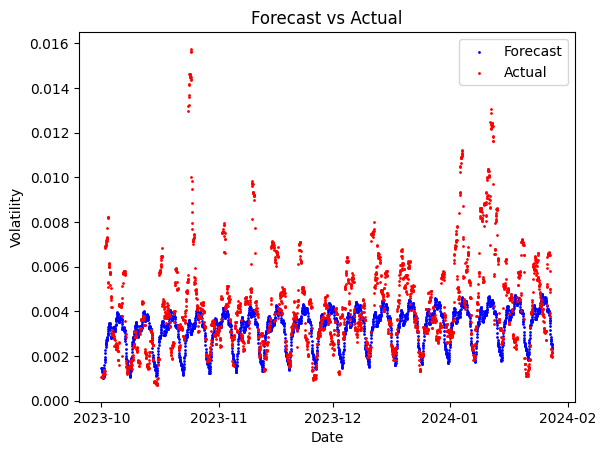

In [15]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# forecast의 scatter plot 그리기
plt.scatter(forecast['ds'], forecast['yhat1'], s=1, label='Forecast', color='blue')

# test 데이터의 scatter plot 그리기 (빨간색)
plt.scatter(test['ds'], test['y'], s=1, label='Actual', color='red')

# 그래프에 제목과 범례 추가
plt.title('Forecast vs Actual')
plt.legend()

# x축, y축 라벨 추가
plt.xlabel('Date')
plt.ylabel('Volatility')

# x축의 눈금을 월로 설정하기
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))

# 그래프 표시
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = test['y']
y_pred = forecast['yhat1']
mean_absolute_percentage_error(y_true, y_pred)

0.30987092139048433

In [23]:
df.columns

Index(['time', 'Open', 'High', 'Low', 'Close', 'Volume', 'returns',
       'volatility', 'taker/maker_ratio', 'taker-maker_diffsum', 'bbandup',
       'bbandmid', 'bbandlow', 'rsi', 'cci', 'williumR', 'parabol', 'adx',
       'plusdi', 'plusdm', 'atr', 'FI', 'MFI', 'CDLDRAGONFLYDOJI',
       'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHIKKAKE',
       'CDLHIKKAKEMOD', 'CDLLONGLEGGEDDOJI', 'CDLRICKSHAWMAN', 'CDLTAKURI',
       'CDLTRISTAR', 'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator',
       'Momentum', 'Awesome_Oscillator', 'AC', 'BOP', 'rv_d', 'rv_w'],
      dtype='object')

####실제로 generate하기####

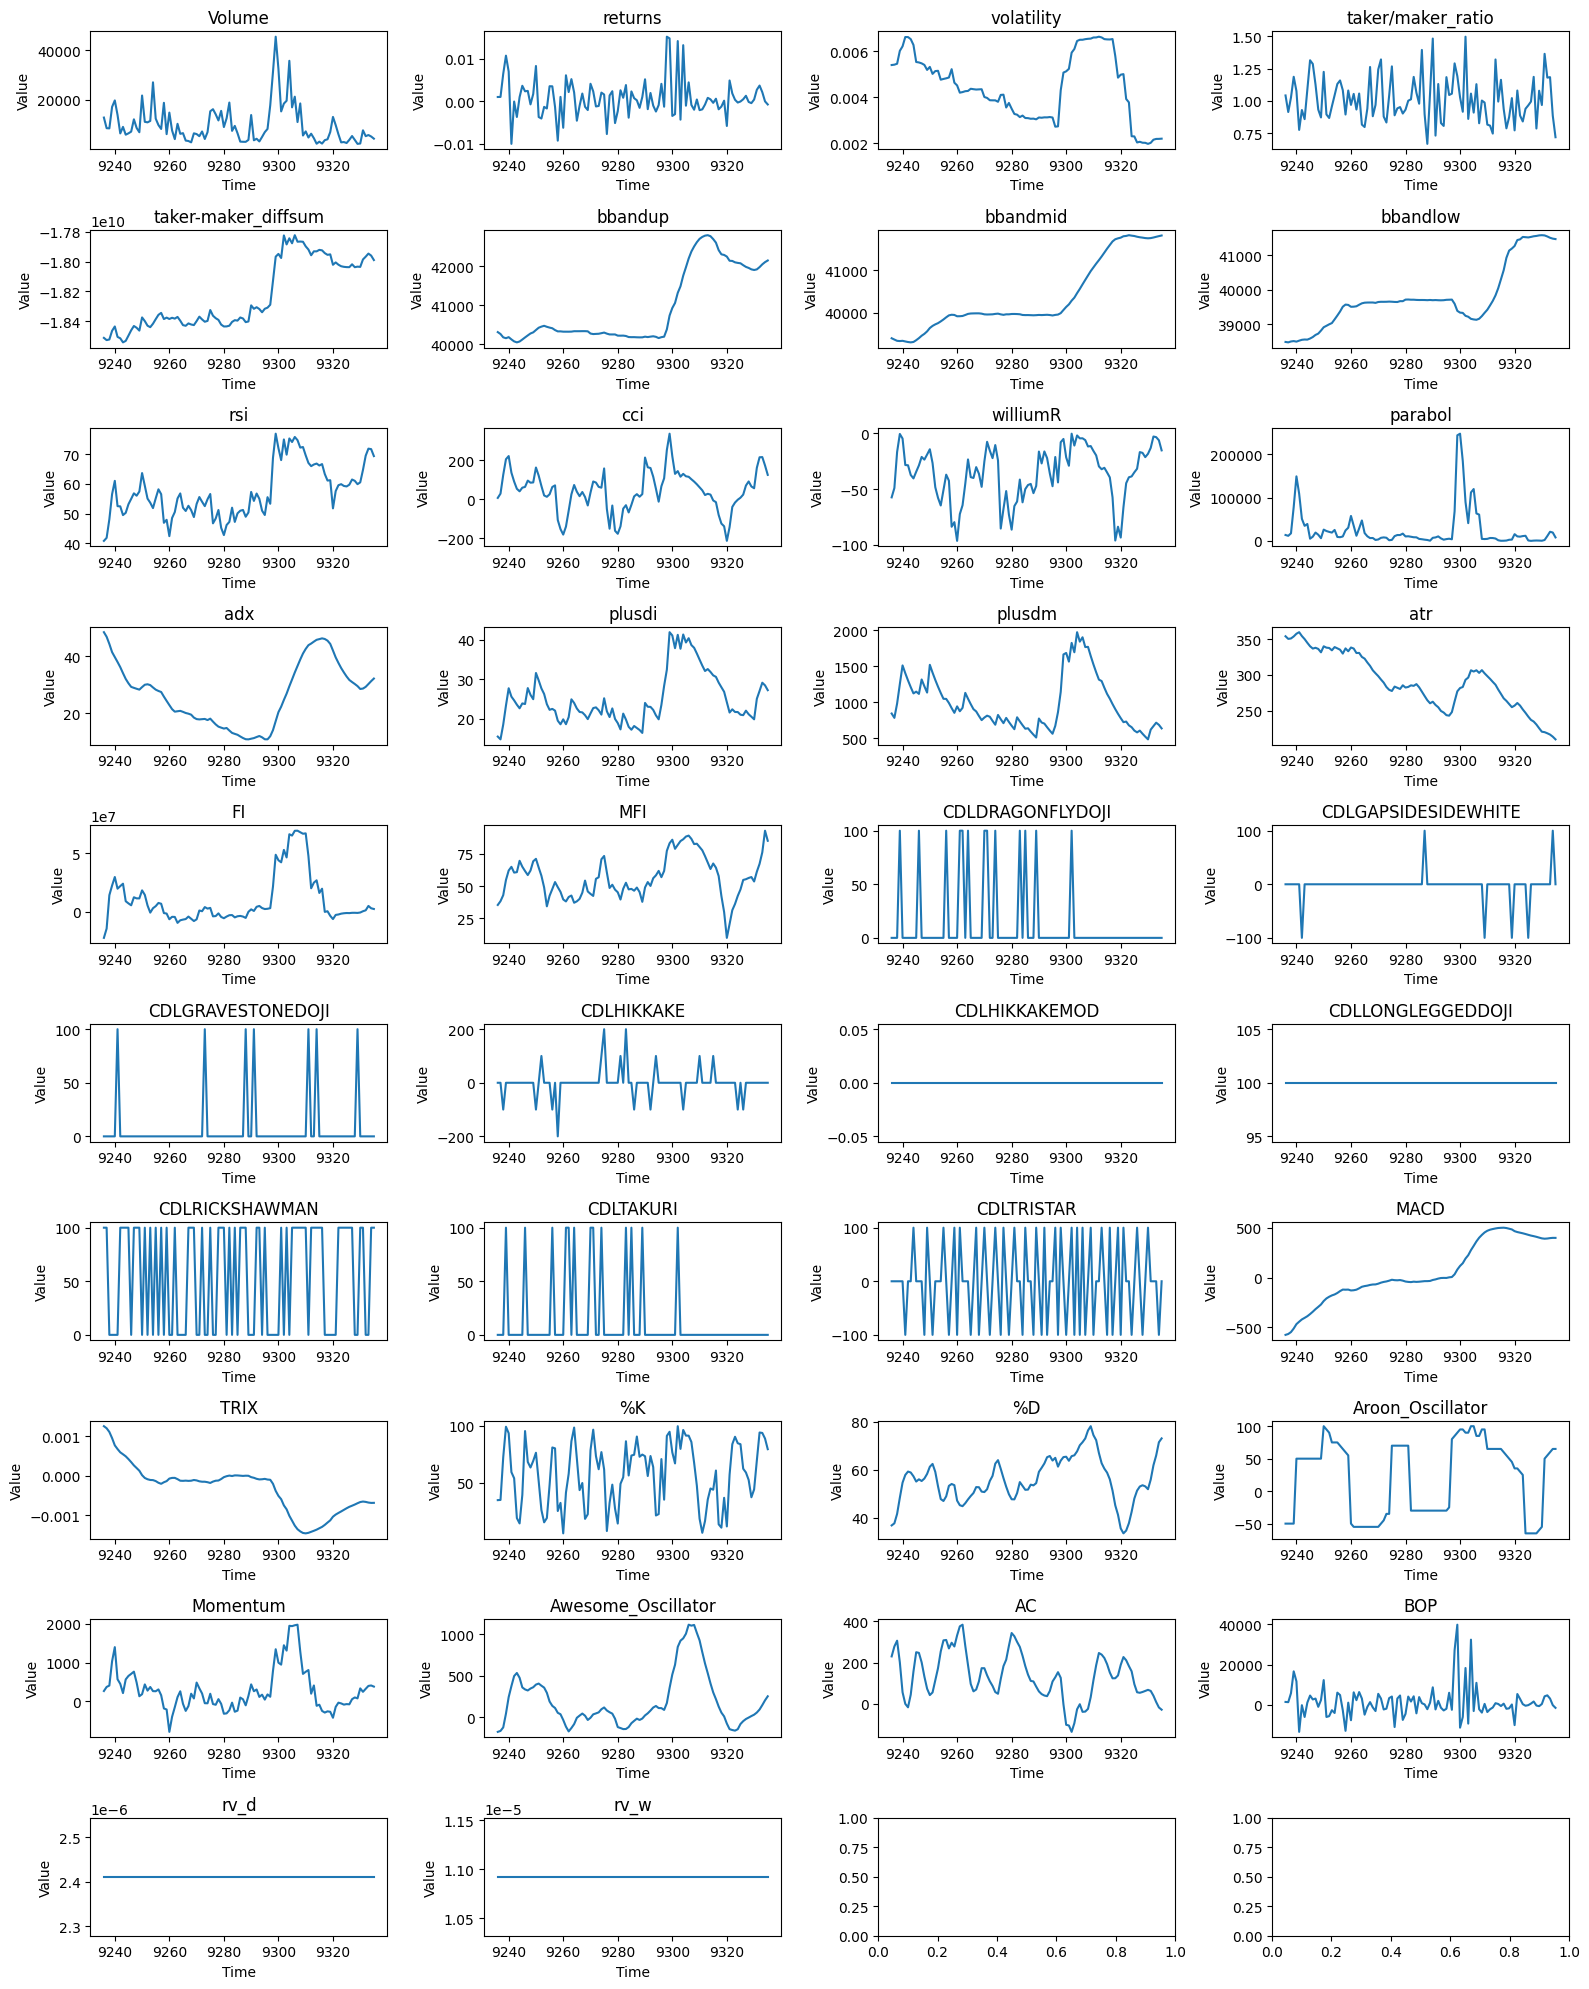

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


#최근 데이터 eda
newdf=df.iloc[-100:,5:]


# 4x8의 서브플롯 생성
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(16, 20))

# 데이터프레임의 모든 열에 대해 라인 플롯 그리기
for i, column in enumerate(newdf.columns):
    row = i // 4
    col = i % 4
    axs[row, col].plot(newdf.index, newdf[column], label=column)
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Value')
    #axs[row, col].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [246]:
NeuralProphet?

Init signature:
NeuralProphet(
    growth: Literal['off', 'linear', 'discontinuous'] = 'linear',
    changepoints: Optional[list] = None,
    n_changepoints: int = 10,
    changepoints_range: float = 0.8,
    trend_reg: float = 0,
    trend_reg_threshold: Union[bool, float, NoneType] = False,
    trend_global_local: str = 'global',
    yearly_seasonality: Union[Literal['auto'], bool, int] = 'auto',
    weekly_seasonality: Union[Literal['auto'], bool, int] = 'auto',
    daily_seasonality: Union[Literal['auto'], bool, int] = 'auto',
    seasonality_mode: Literal['additive', 'multiplicative'] = 'additive',
    seasonality_reg: float = 0,
    season_global_local: Literal['global', 'local'] = 'global',
    n_forecasts: int = 1,
    n_lags: int = 0,
    ar_layers: Optional[list] = [],
    ar_reg: Optional[float] = None,
    lagged_reg_layers: Optional[list] = [],
    learning_rate: Optional[float] = None,
    epochs: Optional[int] = None,
    batch_size: Optional[int] = None,
    loss_func: 

In [270]:
from neuralprophet import NeuralProphet

def generate(data):
    empty_df=pd.DataFrame()
    for i in data.columns[1:]:

        #전용 train 데이터 생성
        train = pd.DataFrame({"ds": data["time"], "y": data[i]})
        print(train)

        # NeuralProphet 모델 초기화
        model = NeuralProphet(
            yearly_seasonality=False,
            weekly_seasonality=True,
            daily_seasonality=True,
            seasonality_mode='multiplicative',
            changepoints_range=1,
        )
        # 모델 학습
        model.fit(train,freq='h')

        # 예측을 위한 데이터 프레임 생성
        future = model.make_future_dataframe(train, periods=24*100)

        # 예측
        forecast = model.predict(future)
        empty_df['time']=forecast['ds']
        empty_df[i]=forecast['yhat1']
    
    return empty_df

        
            

In [243]:
# #Other version

# def generate(data):
#     empty_df=pd.DataFrame()

#     #print(train)
#     for i in data.columns[1:]:
        
#         #전용 train 데이터 생성
#         train = pd.DataFrame({"ds": data["time"], "y": data[i]})

#         # NeuralProphet 모델 초기화
#         model = NeuralProphet(

#         growth='linear', # 추세 유형 설정(linear, discontinuous, off 중 선택 가능)

#         yearly_seasonality="auto", #년간 계절성 설정

#         weekly_seasonality=True, #주간 계절성 설정

#         daily_seasonality=True, #일간 계절성 설정

#         batch_size=64,#배치 사이즈 설정

#         epochs=50,#학습 횟수 설정

#         learning_rate=0.01, # 학습률 설정

#         n_forecasts=24*3,

#         #n_lags=1,

#         #num_hidden_layers=4, #히든 레이어 수 설정

#         #d_hidden=8,#은닉층에 대한 차원 수 설정
#         )

#         # 모델 학습
#         model.fit(train,freq='h')

#         # 예측을 위한 데이터 프레임 생성
#         future = model.make_future_dataframe(train, periods=24*3)
        
#         # 예측
#         forecast = model.predict(future)

#         empty_df['time']=forecast['ds']
#         empty_df[i]=forecast['yhat1']
    
#     return empty_df

In [275]:
import pandas as pd
df=pd.read_csv("index.csv")
df=df.iloc[:,1:]
gen_df=df.iloc[:,8:]
gen_df['Volume']=df['Volume']
# 'time' 열을 맨 처음 열로 이동
gen_df.insert(0, 'time', df['time'])

In [294]:
ex=generate(gen_df[['time','rsi']])

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


                       ds          y
0     2023-01-04 00:00:00  46.214262
1     2023-01-04 01:00:00  55.036042
2     2023-01-04 02:00:00  60.678232
3     2023-01-04 03:00:00  74.151418
4     2023-01-04 04:00:00  73.404367
...                   ...        ...
9331  2024-01-27 19:00:00  64.725496
9332  2024-01-27 20:00:00  69.510990
9333  2024-01-27 21:00:00  71.876524
9334  2024-01-27 22:00:00  71.706699
9335  2024-01-27 23:00:00  69.369707

[9336 rows x 2 columns]


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


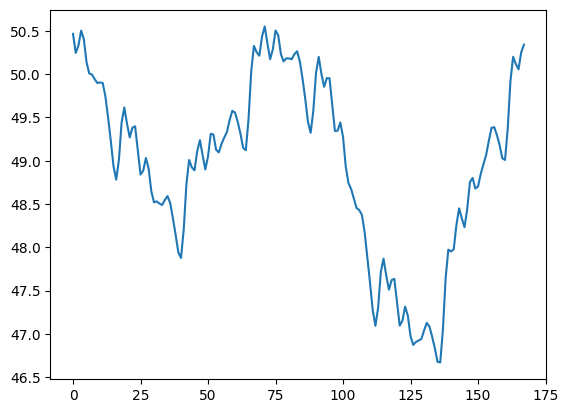

In [295]:
plt.plot(ex['rsi'].iloc[:168])

In [296]:
ex['rsi']

0       50.465508
1       50.245361
2       50.329025
3       50.502605
4       50.406395
          ...    
2395    44.279778
2396    44.197319
2397    44.165897
2398    44.369713
2399    44.482529
Name: rsi, Length: 2400, dtype: float32

In [297]:
gen_df['rsi']

0       46.214262
1       55.036042
2       60.678232
3       74.151418
4       73.404367
          ...    
9331    64.725496
9332    69.510990
9333    71.876524
9334    71.706699
9335    69.369707
Name: rsi, Length: 9336, dtype: float64

In [276]:
gen_df

,time,taker/maker_ratio,taker-maker_diffsum,bbandup,bbandmid,bbandlow,rsi,cci,williumR,parabol,...,%K,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv_d,rv_w,Volume
0,2023-01-04 00:00:00,0.861135,-2.211825e+07,16753.321095,16680.525,16607.728905,46.214262,-21.456233,-66.403402,35.538400,...,37.547893,43.528752,-55.0,2.5,-18.965,7.704,-2216.187714,3.026353e-08,0.000002,4299.783
1,2023-01-04 01:00:00,1.208955,4.494365e+05,16750.255457,16679.330,16608.404543,55.036042,87.921893,-41.798299,204.178400,...,61.079219,45.158317,-55.0,25.3,-9.770,7.858,7445.095193,4.843850e-07,0.000002,14283.553
2,2023-01-04 02:00:00,1.258681,2.109458e+07,16751.869342,16679.790,16607.710658,60.678232,166.128032,-21.810450,690.524000,...,80.542563,49.453631,-55.0,111.7,3.810,6.252,6529.870215,5.912750e-06,0.000002,10777.263
3,2023-01-04 03:00:00,1.230562,9.185839e+07,16790.578300,16686.430,16582.281700,74.151418,292.240779,-5.228031,5210.666400,...,93.713776,53.227764,50.0,229.9,34.330,-4.774,36618.666426,3.882949e-06,0.000002,40719.495
4,2023-01-04 04:00:00,0.851541,6.359019e+07,16820.207767,16693.550,16566.892233,73.404367,232.564806,-17.099638,6730.788000,...,79.899497,57.846384,55.0,214.7,64.250,-18.258,-1153.832027,5.754178e-05,0.000002,20900.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,2024-01-27 19:00:00,1.363879,-1.798520e+10,41921.823480,41750.190,41578.556520,64.725496,160.741331,-13.065327,2060.494386,...,69.481257,55.875081,50.0,240.0,57.270,62.924,4284.714913,2.410958e-06,0.000011,7765.565
9332,2024-01-27 20:00:00,1.180081,-1.796644e+10,41979.712397,41764.030,41548.347603,69.510990,214.197829,-2.873644,11222.415986,...,94.052478,61.847046,55.0,318.0,93.870,39.618,4769.596793,2.410958e-06,0.000011,5408.243
9333,2024-01-27 21:00:00,1.183708,-1.794570e+10,42050.892326,41780.675,41510.457674,71.876524,215.151932,-3.451273,21086.401586,...,93.661651,65.916870,60.0,393.1,146.945,9.018,3154.995308,2.410958e-06,0.000011,5859.277
9334,2024-01-27 22:00:00,0.885899,-1.795913e+10,42107.527687,41796.330,41485.132313,71.706699,172.484090,-6.263603,19350.571985,...,88.741578,71.432007,65.0,404.7,204.470,-17.330,-101.773417,2.410958e-06,0.000011,5271.863


In [277]:
new_df=generate(gen_df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a futu

                       ds         y
0     2023-01-04 00:00:00  0.861135
1     2023-01-04 01:00:00  1.208955
2     2023-01-04 02:00:00  1.258681
3     2023-01-04 03:00:00  1.230562
4     2023-01-04 04:00:00  0.851541
...                   ...       ...
9331  2024-01-27 19:00:00  1.363879
9332  2024-01-27 20:00:00  1.180081
9333  2024-01-27 21:00:00  1.183708
9334  2024-01-27 22:00:00  0.885899
9335  2024-01-27 23:00:00  0.719722

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00 -2.211825e+07
1     2023-01-04 01:00:00  4.494365e+05
2     2023-01-04 02:00:00  2.109458e+07
3     2023-01-04 03:00:00  9.185839e+07
4     2023-01-04 04:00:00  6.359019e+07
...                   ...           ...
9331  2024-01-27 19:00:00 -1.798520e+10
9332  2024-01-27 20:00:00 -1.796644e+10
9333  2024-01-27 21:00:00 -1.794570e+10
9334  2024-01-27 22:00:00 -1.795913e+10
9335  2024-01-27 23:00:00 -1.798932e+10

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00  16753.321095
1     2023-01-04 01:00:00  16750.255457
2     2023-01-04 02:00:00  16751.869342
3     2023-01-04 03:00:00  16790.578300
4     2023-01-04 04:00:00  16820.207767
...                   ...           ...
9331  2024-01-27 19:00:00  41921.823480
9332  2024-01-27 20:00:00  41979.712397
9333  2024-01-27 21:00:00  42050.892326
9334  2024-01-27 22:00:00  42107.527687
9335  2024-01-27 23:00:00  42149.791084

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  16680.525
1     2023-01-04 01:00:00  16679.330
2     2023-01-04 02:00:00  16679.790
3     2023-01-04 03:00:00  16686.430
4     2023-01-04 04:00:00  16693.550
...                   ...        ...
9331  2024-01-27 19:00:00  41750.190
9332  2024-01-27 20:00:00  41764.030
9333  2024-01-27 21:00:00  41780.675
9334  2024-01-27 22:00:00  41796.330
9335  2024-01-27 23:00:00  41811.180

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00  16607.728905
1     2023-01-04 01:00:00  16608.404543
2     2023-01-04 02:00:00  16607.710658
3     2023-01-04 03:00:00  16582.281700
4     2023-01-04 04:00:00  16566.892233
...                   ...           ...
9331  2024-01-27 19:00:00  41578.556520
9332  2024-01-27 20:00:00  41548.347603
9333  2024-01-27 21:00:00  41510.457674
9334  2024-01-27 22:00:00  41485.132313
9335  2024-01-27 23:00:00  41472.568916

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  46.214262
1     2023-01-04 01:00:00  55.036042
2     2023-01-04 02:00:00  60.678232
3     2023-01-04 03:00:00  74.151418
4     2023-01-04 04:00:00  73.404367
...                   ...        ...
9331  2024-01-27 19:00:00  64.725496
9332  2024-01-27 20:00:00  69.510990
9333  2024-01-27 21:00:00  71.876524
9334  2024-01-27 22:00:00  71.706699
9335  2024-01-27 23:00:00  69.369707

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds           y
0     2023-01-04 00:00:00  -21.456233
1     2023-01-04 01:00:00   87.921893
2     2023-01-04 02:00:00  166.128032
3     2023-01-04 03:00:00  292.240779
4     2023-01-04 04:00:00  232.564806
...                   ...         ...
9331  2024-01-27 19:00:00  160.741331
9332  2024-01-27 20:00:00  214.197829
9333  2024-01-27 21:00:00  215.151932
9334  2024-01-27 22:00:00  172.484090
9335  2024-01-27 23:00:00  124.437100

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00 -66.403402
1     2023-01-04 01:00:00 -41.798299
2     2023-01-04 02:00:00 -21.810450
3     2023-01-04 03:00:00  -5.228031
4     2023-01-04 04:00:00 -17.099638
...                   ...        ...
9331  2024-01-27 19:00:00 -13.065327
9332  2024-01-27 20:00:00  -2.873644
9333  2024-01-27 21:00:00  -3.451273
9334  2024-01-27 22:00:00  -6.263603
9335  2024-01-27 23:00:00 -15.294542

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00     35.538400
1     2023-01-04 01:00:00    204.178400
2     2023-01-04 02:00:00    690.524000
3     2023-01-04 03:00:00   5210.666400
4     2023-01-04 04:00:00   6730.788000
...                   ...           ...
9331  2024-01-27 19:00:00   2060.494386
9332  2024-01-27 20:00:00  11222.415986
9333  2024-01-27 21:00:00  21086.401586
9334  2024-01-27 22:00:00  19350.571985
9335  2024-01-27 23:00:00   8057.230386

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  16.904644
1     2023-01-04 01:00:00  17.271726
2     2023-01-04 02:00:00  18.041115
3     2023-01-04 03:00:00  20.475941
4     2023-01-04 04:00:00  23.056616
...                   ...        ...
9331  2024-01-27 19:00:00  28.645204
9332  2024-01-27 20:00:00  29.247563
9333  2024-01-27 21:00:00  30.234439
9334  2024-01-27 22:00:00  31.242413
9335  2024-01-27 23:00:00  32.152865

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  18.975350
1     2023-01-04 01:00:00  27.121704
2     2023-01-04 02:00:00  27.983865
3     2023-01-04 03:00:00  39.730538
4     2023-01-04 04:00:00  41.043242
...                   ...        ...
9331  2024-01-27 19:00:00  25.021369
9332  2024-01-27 20:00:00  27.016268
9333  2024-01-27 21:00:00  29.094420
9334  2024-01-27 22:00:00  28.426994
9335  2024-01-27 23:00:00  27.202652

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds           y
0     2023-01-04 00:00:00  101.659882
1     2023-01-04 01:00:00  155.998462
2     2023-01-04 02:00:00  164.655714
3     2023-01-04 03:00:00  273.094592
4     2023-01-04 04:00:00  287.987835
...                   ...         ...
9331  2024-01-27 19:00:00  622.692243
9332  2024-01-27 20:00:00  671.214226
9333  2024-01-27 21:00:00  718.870352
9334  2024-01-27 22:00:00  689.022470
9335  2024-01-27 23:00:00  639.806579

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds           y
0     2023-01-04 00:00:00   38.448720
1     2023-01-04 01:00:00   39.757096
2     2023-01-04 02:00:00   40.241859
3     2023-01-04 03:00:00   43.600464
4     2023-01-04 04:00:00   44.260448
...                   ...         ...
9331  2024-01-27 19:00:00  220.179765
9332  2024-01-27 20:00:00  218.627106
9333  2024-01-27 21:00:00  216.799536
9334  2024-01-27 22:00:00  213.889551
9335  2024-01-27 23:00:00  210.136566

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00 -2.153174e+06
1     2023-01-04 01:00:00 -1.510995e+06
2     2023-01-04 02:00:00 -1.237540e+06
3     2023-01-04 03:00:00  6.077428e+06
4     2023-01-04 04:00:00  5.489718e+06
...                   ...           ...
9331  2024-01-27 19:00:00  4.383103e+05
9332  2024-01-27 20:00:00  1.236455e+06
9333  2024-01-27 21:00:00  4.963129e+06
9334  2024-01-27 22:00:00  2.964688e+06
9335  2024-01-27 23:00:00  2.355087e+06

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  27.061138
1     2023-01-04 01:00:00  34.813659
2     2023-01-04 02:00:00  40.808613
3     2023-01-04 03:00:00  51.946116
4     2023-01-04 04:00:00  67.445661
...                   ...        ...
9331  2024-01-27 19:00:00  61.130749
9332  2024-01-27 20:00:00  67.242649
9333  2024-01-27 21:00:00  76.167119
9334  2024-01-27 22:00:00  92.934178
9335  2024-01-27 23:00:00  85.120805

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds  y
0     2023-01-04 00:00:00  0
1     2023-01-04 01:00:00  0
2     2023-01-04 02:00:00  0
3     2023-01-04 03:00:00  0
4     2023-01-04 04:00:00  0
...                   ... ..
9331  2024-01-27 19:00:00  0
9332  2024-01-27 20:00:00  0
9333  2024-01-27 21:00:00  0
9334  2024-01-27 22:00:00  0
9335  2024-01-27 23:00:00  0

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds    y
0     2023-01-04 00:00:00    0
1     2023-01-04 01:00:00    0
2     2023-01-04 02:00:00    0
3     2023-01-04 03:00:00    0
4     2023-01-04 04:00:00    0
...                   ...  ...
9331  2024-01-27 19:00:00    0
9332  2024-01-27 20:00:00    0
9333  2024-01-27 21:00:00    0
9334  2024-01-27 22:00:00  100
9335  2024-01-27 23:00:00    0

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds  y
0     2023-01-04 00:00:00  0
1     2023-01-04 01:00:00  0
2     2023-01-04 02:00:00  0
3     2023-01-04 03:00:00  0
4     2023-01-04 04:00:00  0
...                   ... ..
9331  2024-01-27 19:00:00  0
9332  2024-01-27 20:00:00  0
9333  2024-01-27 21:00:00  0
9334  2024-01-27 22:00:00  0
9335  2024-01-27 23:00:00  0

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds  y
0     2023-01-04 00:00:00  0
1     2023-01-04 01:00:00  0
2     2023-01-04 02:00:00  0
3     2023-01-04 03:00:00  0
4     2023-01-04 04:00:00  0
...                   ... ..
9331  2024-01-27 19:00:00  0
9332  2024-01-27 20:00:00  0
9333  2024-01-27 21:00:00  0
9334  2024-01-27 22:00:00  0
9335  2024-01-27 23:00:00  0

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds  y
0     2023-01-04 00:00:00  0
1     2023-01-04 01:00:00  0
2     2023-01-04 02:00:00  0
3     2023-01-04 03:00:00  0
4     2023-01-04 04:00:00  0
...                   ... ..
9331  2024-01-27 19:00:00  0
9332  2024-01-27 20:00:00  0
9333  2024-01-27 21:00:00  0
9334  2024-01-27 22:00:00  0
9335  2024-01-27 23:00:00  0

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds    y
0     2023-01-04 00:00:00  100
1     2023-01-04 01:00:00  100
2     2023-01-04 02:00:00  100
3     2023-01-04 03:00:00  100
4     2023-01-04 04:00:00  100
...                   ...  ...
9331  2024-01-27 19:00:00  100
9332  2024-01-27 20:00:00  100
9333  2024-01-27 21:00:00  100
9334  2024-01-27 22:00:00  100
9335  2024-01-27 23:00:00  100

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds    y
0     2023-01-04 00:00:00  100
1     2023-01-04 01:00:00  100
2     2023-01-04 02:00:00  100
3     2023-01-04 03:00:00    0
4     2023-01-04 04:00:00    0
...                   ...  ...
9331  2024-01-27 19:00:00  100
9332  2024-01-27 20:00:00    0
9333  2024-01-27 21:00:00    0
9334  2024-01-27 22:00:00  100
9335  2024-01-27 23:00:00  100

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds  y
0     2023-01-04 00:00:00  0
1     2023-01-04 01:00:00  0
2     2023-01-04 02:00:00  0
3     2023-01-04 03:00:00  0
4     2023-01-04 04:00:00  0
...                   ... ..
9331  2024-01-27 19:00:00  0
9332  2024-01-27 20:00:00  0
9333  2024-01-27 21:00:00  0
9334  2024-01-27 22:00:00  0
9335  2024-01-27 23:00:00  0

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds    y
0     2023-01-04 00:00:00    0
1     2023-01-04 01:00:00  100
2     2023-01-04 02:00:00    0
3     2023-01-04 03:00:00    0
4     2023-01-04 04:00:00 -100
...                   ...  ...
9331  2024-01-27 19:00:00    0
9332  2024-01-27 20:00:00    0
9333  2024-01-27 21:00:00    0
9334  2024-01-27 22:00:00 -100
9335  2024-01-27 23:00:00    0

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds           y
0     2023-01-04 00:00:00    3.889616
1     2023-01-04 01:00:00    4.659954
2     2023-01-04 02:00:00    6.573027
3     2023-01-04 03:00:00   13.054485
4     2023-01-04 04:00:00   18.642430
...                   ...         ...
9331  2024-01-27 19:00:00  391.062092
9332  2024-01-27 20:00:00  393.019445
9333  2024-01-27 21:00:00  397.157550
9334  2024-01-27 22:00:00  399.604647
9335  2024-01-27 23:00:00  399.321142

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00  3.507949e-05
1     2023-01-04 01:00:00  2.282795e-05
2     2023-01-04 02:00:00 -1.985936e-07
3     2023-01-04 03:00:00 -6.791250e-05
4     2023-01-04 04:00:00 -1.233662e-04
...                   ...           ...
9331  2024-01-27 19:00:00 -6.512821e-04
9332  2024-01-27 20:00:00 -6.599194e-04
9333  2024-01-27 21:00:00 -6.763848e-04
9334  2024-01-27 22:00:00 -6.855390e-04
9335  2024-01-27 23:00:00 -6.838118e-04

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  37.547893
1     2023-01-04 01:00:00  61.079219
2     2023-01-04 02:00:00  80.542563
3     2023-01-04 03:00:00  93.713776
4     2023-01-04 04:00:00  79.899497
...                   ...        ...
9331  2024-01-27 19:00:00  69.481257
9332  2024-01-27 20:00:00  94.052478
9333  2024-01-27 21:00:00  93.661651
9334  2024-01-27 22:00:00  88.741578
9335  2024-01-27 23:00:00  79.393204

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00  43.528752
1     2023-01-04 01:00:00  45.158317
2     2023-01-04 02:00:00  49.453631
3     2023-01-04 03:00:00  53.227764
4     2023-01-04 04:00:00  57.846384
...                   ...        ...
9331  2024-01-27 19:00:00  55.875081
9332  2024-01-27 20:00:00  61.847046
9333  2024-01-27 21:00:00  65.916870
9334  2024-01-27 22:00:00  71.432007
9335  2024-01-27 23:00:00  73.036024

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds     y
0     2023-01-04 00:00:00 -55.0
1     2023-01-04 01:00:00 -55.0
2     2023-01-04 02:00:00 -55.0
3     2023-01-04 03:00:00  50.0
4     2023-01-04 04:00:00  55.0
...                   ...   ...
9331  2024-01-27 19:00:00  50.0
9332  2024-01-27 20:00:00  55.0
9333  2024-01-27 21:00:00  60.0
9334  2024-01-27 22:00:00  65.0
9335  2024-01-27 23:00:00  65.0

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds      y
0     2023-01-04 00:00:00    2.5
1     2023-01-04 01:00:00   25.3
2     2023-01-04 02:00:00  111.7
3     2023-01-04 03:00:00  229.9
4     2023-01-04 04:00:00  214.7
...                   ...    ...
9331  2024-01-27 19:00:00  240.0
9332  2024-01-27 20:00:00  318.0
9333  2024-01-27 21:00:00  393.1
9334  2024-01-27 22:00:00  404.7
9335  2024-01-27 23:00:00  375.3

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds        y
0     2023-01-04 00:00:00  -18.965
1     2023-01-04 01:00:00   -9.770
2     2023-01-04 02:00:00    3.810
3     2023-01-04 03:00:00   34.330
4     2023-01-04 04:00:00   64.250
...                   ...      ...
9331  2024-01-27 19:00:00   57.270
9332  2024-01-27 20:00:00   93.870
9333  2024-01-27 21:00:00  146.945
9334  2024-01-27 22:00:00  204.470
9335  2024-01-27 23:00:00  253.080

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds       y
0     2023-01-04 00:00:00   7.704
1     2023-01-04 01:00:00   7.858
2     2023-01-04 02:00:00   6.252
3     2023-01-04 03:00:00  -4.774
4     2023-01-04 04:00:00 -18.258
...                   ...     ...
9331  2024-01-27 19:00:00  62.924
9332  2024-01-27 20:00:00  39.618
9333  2024-01-27 21:00:00   9.018
9334  2024-01-27 22:00:00 -17.330
9335  2024-01-27 23:00:00 -28.232

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00  -2216.187714
1     2023-01-04 01:00:00   7445.095193
2     2023-01-04 02:00:00   6529.870215
3     2023-01-04 03:00:00  36618.666426
4     2023-01-04 04:00:00  -1153.832027
...                   ...           ...
9331  2024-01-27 19:00:00   4284.714913
9332  2024-01-27 20:00:00   4769.596793
9333  2024-01-27 21:00:00   3154.995308
9334  2024-01-27 22:00:00   -101.773417
9335  2024-01-27 23:00:00  -1441.987759

[9336 rows x 2 columns]


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds             y
0     2023-01-04 00:00:00  3.026353e-08
1     2023-01-04 01:00:00  4.843850e-07
2     2023-01-04 02:00:00  5.912750e-06
3     2023-01-04 03:00:00  3.882949e-06
4     2023-01-04 04:00:00  5.754178e-05
...                   ...           ...
9331  2024-01-27 19:00:00  2.410958e-06
9332  2024-01-27 20:00:00  2.410958e-06
9333  2024-01-27 21:00:00  2.410958e-06
9334  2024-01-27 22:00:00  2.410958e-06
9335  2024-01-27 23:00:00  2.410958e-06

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds         y
0     2023-01-04 00:00:00  0.000002
1     2023-01-04 01:00:00  0.000002
2     2023-01-04 02:00:00  0.000002
3     2023-01-04 03:00:00  0.000002
4     2023-01-04 04:00:00  0.000002
...                   ...       ...
9331  2024-01-27 19:00:00  0.000011
9332  2024-01-27 20:00:00  0.000011
9333  2024-01-27 21:00:00  0.000011
9334  2024-01-27 22:00:00  0.000011
9335  2024-01-27 23:00:00  0.000011

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_uti

                       ds          y
0     2023-01-04 00:00:00   4299.783
1     2023-01-04 01:00:00  14283.553
2     2023-01-04 02:00:00  10777.263
3     2023-01-04 03:00:00  40719.495
4     2023-01-04 04:00:00  20900.843
...                   ...        ...
9331  2024-01-27 19:00:00   7765.565
9332  2024-01-27 20:00:00   5408.243
9333  2024-01-27 21:00:00   5859.277
9334  2024-01-27 22:00:00   5271.863
9335  2024-01-27 23:00:00   4399.800

[9336 rows x 2 columns]


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (146) is too small than the required number                     for the learning rate finder (249). The results might not be optimal.


Finding best initial lr:   0%|          | 0/249 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.989% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Taewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: 146it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [37]:
new_df

,time,taker/maker_ratio,taker-maker_diffsum,bbandup,bbandmid,bbandlow,rsi,cci,williumR,parabol,...,%K,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv_d,rv_w,Volume
0,2024-01-28 00:00:00,0.974536,-1.602030e+10,45735.406250,46325.062500,48459.539062,52.601730,5.682465,-43.763985,4550.203125,...,53.907925,53.428391,4.222237,12.344727,5.893188,169.538910,631.125000,-0.000025,0.000007,4217.449707
1,2024-01-28 01:00:00,0.977584,-1.600962e+10,45955.761719,46411.359375,46943.820312,53.400864,15.597595,-43.961674,3921.476318,...,51.861229,53.251793,4.222092,9.727295,5.996460,169.513702,-203.343750,-0.000024,0.000007,4137.720703
2,2024-01-28 02:00:00,0.985009,-1.598176e+10,46634.289062,46477.312500,46126.070312,55.701962,33.642792,-43.288403,3767.896729,...,51.604584,53.187164,4.775879,5.010010,4.628540,167.259247,-403.531250,-0.000014,0.000006,2796.076416
3,2024-01-28 03:00:00,0.984808,-1.592807e+10,46940.835938,46516.757812,47048.863281,54.465107,30.925201,-42.497044,2704.928467,...,51.953163,53.172623,4.793365,-4.687744,-3.570923,162.813629,-575.390625,-0.000009,0.000006,1480.666626
4,2024-01-28 04:00:00,0.978592,-1.592640e+10,47559.890625,46620.433594,48025.257812,50.223919,32.512848,-42.215801,149.772522,...,52.216122,53.155388,4.272614,-17.289307,-12.348999,158.705780,-941.515625,-0.000016,0.000006,1236.382080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2024-02-03 19:00:00,1.001595,-1.655512e+10,49862.101562,47289.882812,48889.667969,52.179062,-3.362762,-44.131252,13418.510742,...,55.292927,52.879494,4.575188,-2.206543,-13.800537,216.306122,-371.781250,0.000001,0.000008,7018.291016
164,2024-02-03 20:00:00,0.990344,-1.647146e+10,48153.542969,47202.246094,49588.890625,50.376530,-15.904205,-44.708809,11517.734375,...,55.523594,53.072937,6.123863,-10.070068,-9.849243,205.114471,-85.875000,-0.000009,0.000008,5785.189453
165,2024-02-03 21:00:00,0.981470,-1.643728e+10,47371.500000,47246.312500,48865.898438,51.316261,30.593170,-44.455845,9622.365234,...,57.048241,53.335571,6.592827,-13.926514,-2.389282,193.887848,493.640625,-0.000011,0.000007,3768.468994
166,2024-02-03 22:00:00,0.980552,-1.647246e+10,47690.113281,47318.570312,48866.042969,53.934372,60.108978,-43.414452,7682.416016,...,58.345959,53.579613,5.780945,-6.165039,3.113525,184.101593,1337.609375,-0.000010,0.000007,2558.128662


In [279]:
new_df2=new_df.iloc[:73,:];new_df2

,time,taker/maker_ratio,taker-maker_diffsum,bbandup,bbandmid,bbandlow,rsi,cci,williumR,parabol,...,%K,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv_d,rv_w,Volume
0,2024-01-28 00:00:00,0.978714,-1.901341e+10,42056.625000,41640.265625,41161.480469,50.458530,7.885437,-45.904270,3541.898682,...,52.316654,51.650810,-2.367188,-17.235352,-15.646973,153.711761,118.921875,-1.438934e-07,0.000004,4308.181152
1,2024-01-28 01:00:00,0.982990,-1.902301e+10,42001.550781,41760.195312,41172.238281,50.195953,5.810089,-46.075569,3140.599609,...,50.101906,51.418785,-2.680946,-23.384277,-21.646729,153.120636,-10.156250,-1.887050e-07,0.000004,4224.896484
2,2024-01-28 02:00:00,0.990418,-1.903025e+10,41903.160156,41752.089844,41220.398438,50.175591,6.850525,-45.408684,3287.080322,...,49.817551,51.245193,-2.112045,-31.388672,-26.761719,151.108551,131.671875,-2.149570e-07,0.000004,2836.310547
3,2024-01-28 03:00:00,0.989139,-1.903784e+10,41901.468750,41578.449219,41250.750000,50.318886,8.074982,-44.670845,2483.340332,...,50.449276,51.208733,-1.799767,-40.733643,-30.042114,147.579193,-85.734375,-1.581651e-07,0.000004,1479.292847
4,2024-01-28 04:00:00,0.982044,-1.904720e+10,41971.289062,41397.984375,41229.796875,50.377110,7.099884,-44.396511,250.161957,...,50.761631,51.311378,-2.739296,-53.071533,-31.255249,144.396942,-639.171875,-7.228677e-08,0.000004,1261.994629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-01-30 20:00:00,1.001622,-1.957059e+10,42389.960938,41832.203125,40743.382812,50.334854,-2.252991,-46.578411,26242.207031,...,54.732929,51.641392,-7.766525,-40.089111,-28.796021,265.672699,391.781250,-1.439256e-06,0.000008,13299.688477
69,2024-01-30 21:00:00,0.993232,-1.957540e+10,42399.882812,41918.046875,40720.402344,50.248234,-2.938293,-46.237572,25209.945312,...,55.887497,51.955284,-7.070847,-47.488770,-20.370117,256.935089,782.109375,-1.377312e-06,0.000008,11305.879883
70,2024-01-30 22:00:00,0.990498,-1.957853e+10,42409.265625,41859.320312,40705.406250,50.457020,-1.061768,-45.138718,23918.734375,...,56.921799,52.222023,-7.794456,-34.274170,-11.920532,248.727570,1201.062500,-1.307482e-06,0.000008,10161.562500
71,2024-01-30 23:00:00,0.986751,-1.958806e+10,42474.199219,41795.796875,40686.656250,50.571888,-1.558624,-44.804783,22550.384766,...,55.848511,52.257820,-9.102402,-14.354492,-9.158325,243.318207,1026.406250,-1.220563e-06,0.000008,10831.533203


In [287]:
gen_df['rsi'].iloc[-2]

71.70669904920277

In [293]:
new_df['rsi']


0       50.458530
1       50.195953
2       50.175591
3       50.318886
4       50.377110
          ...    
2395    44.624222
2396    44.467533
2397    44.403969
2398    44.602825
2399    44.715073
Name: rsi, Length: 2400, dtype: float32

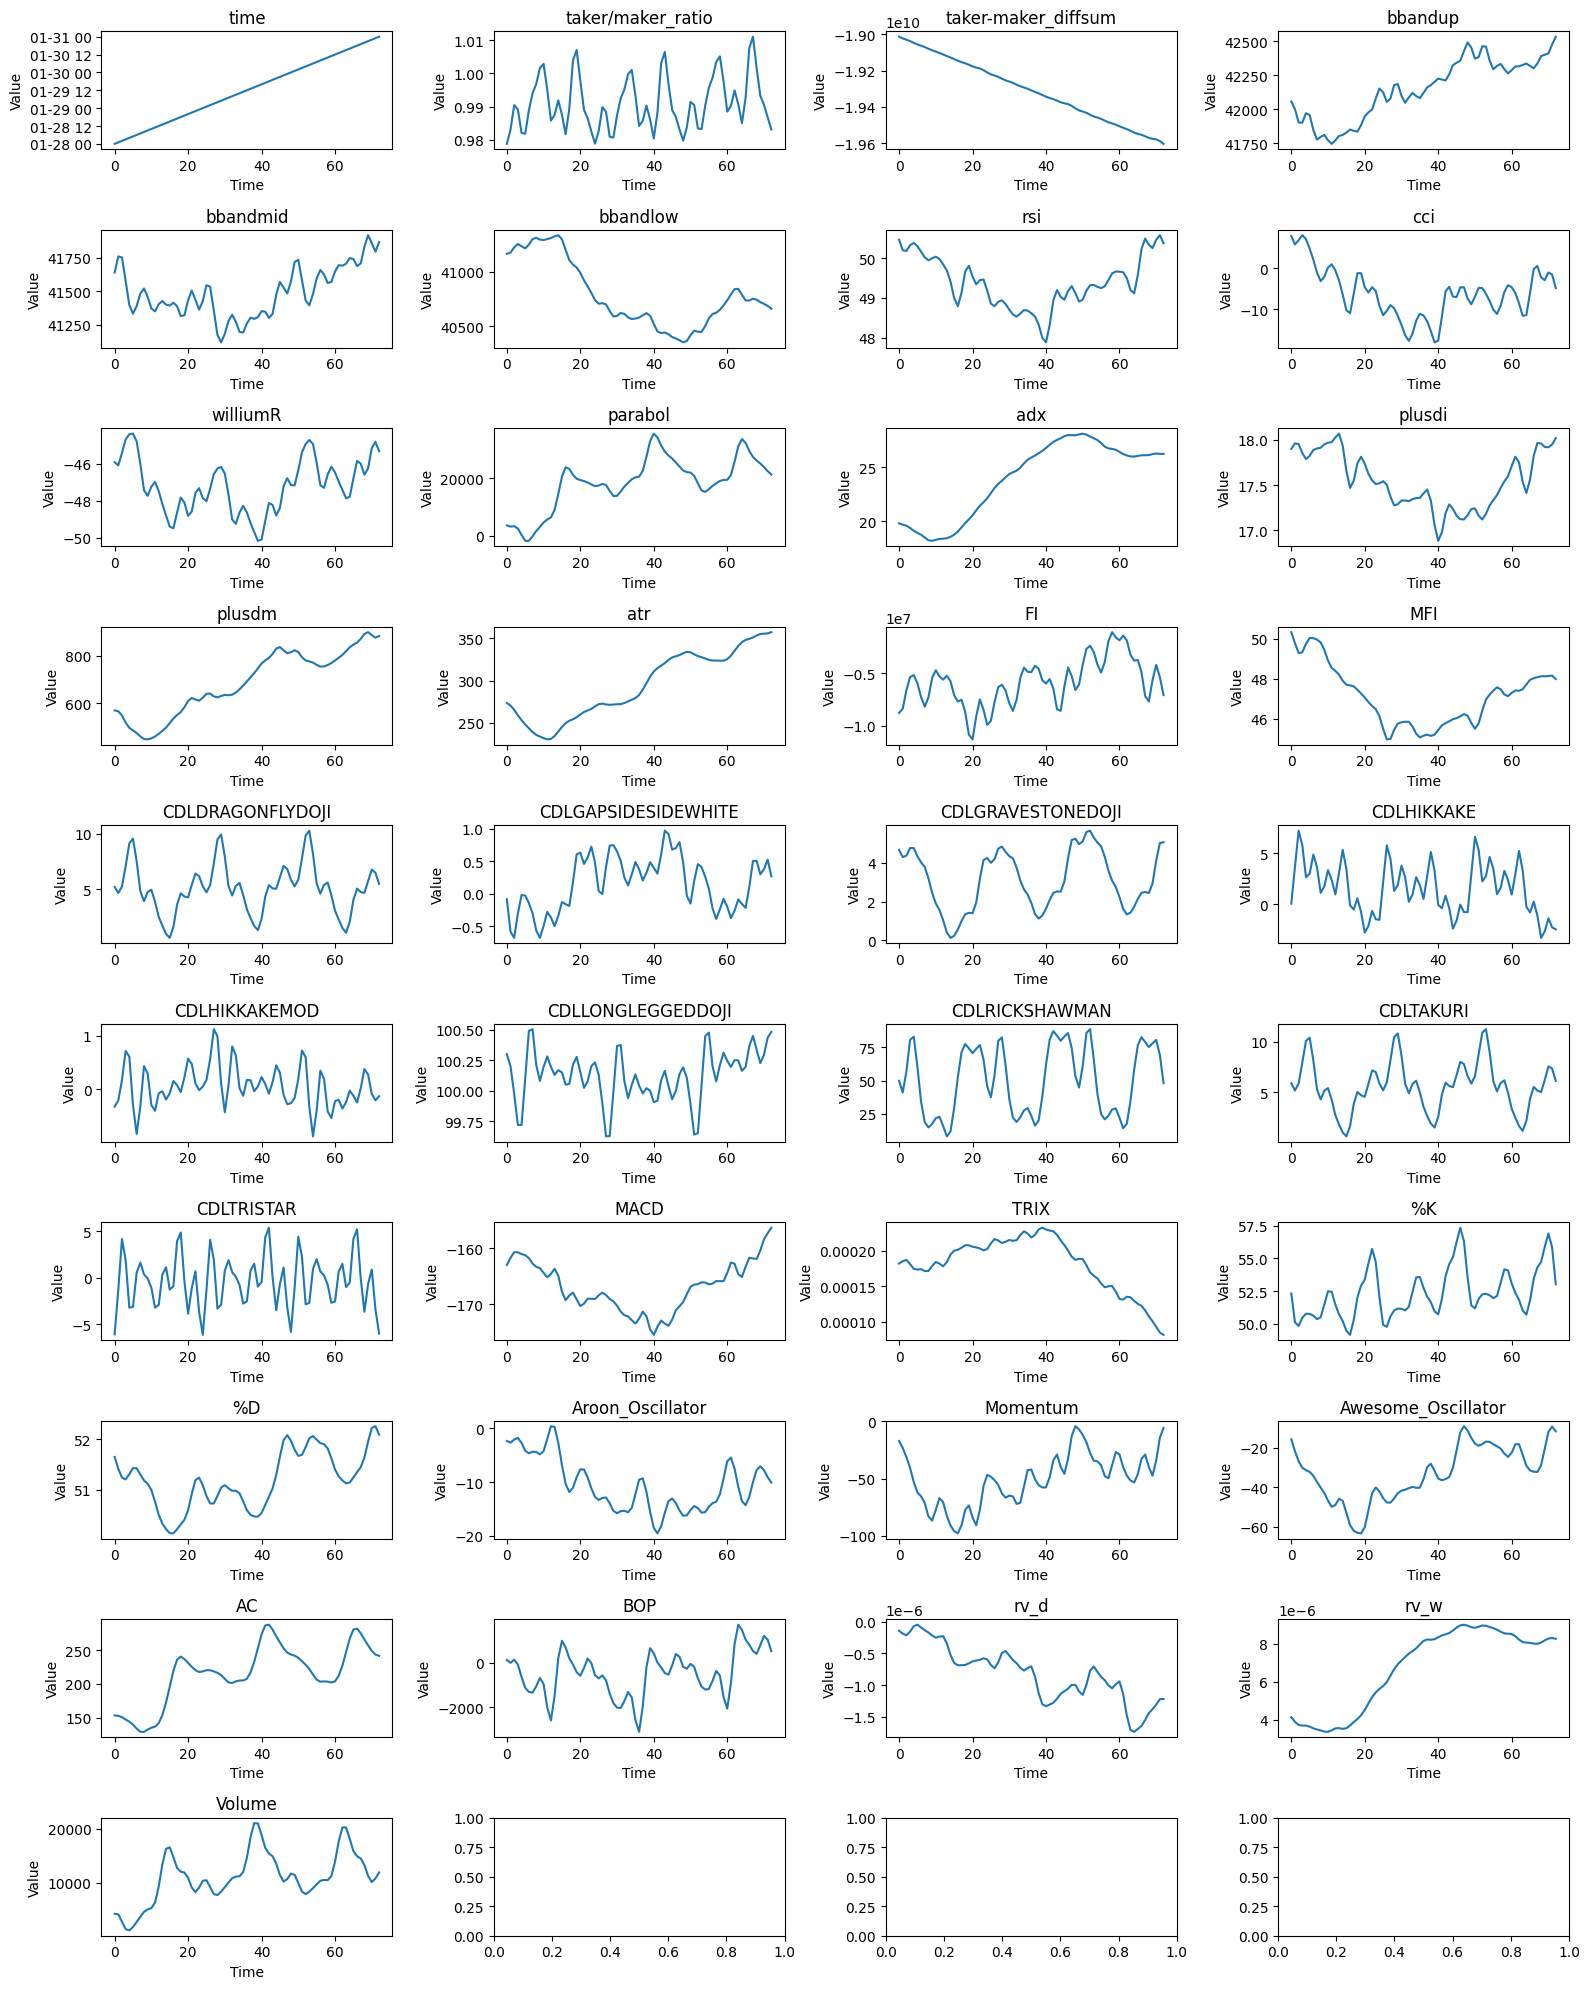

In [280]:
#plt.plot(newdf.iloc[:,1])
# 10*4의 서브플롯 생성
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(16, 20))

# 데이터프레임의 모든 열에 대해 라인 플롯 그리기
for i, column in enumerate(new_df2.columns):
    row = i // 4
    col = i % 4
    axs[row, col].plot(new_df2[column], label=column)
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Value')
    #axs[row, col].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [168]:
new_df.to_csv("data_gen_example.csv")

In [198]:
check=pd.read_csv("df.csv")

In [204]:
check.sort_values(by='returns')

,Open,High,Low,Close,Volume,returns,volatility
2779,29732.8,29732.8,27644.2,27871.9,224546.430,-0.062584,0.016885
1465,23406.8,23411.6,21883.2,22137.5,168787.172,-0.054228,0.012357
4749,27663.5,27727.8,24581.0,26249.9,170331.020,-0.051100,0.011786
5493,27663.5,27727.8,24581.0,26249.9,170331.020,-0.051100,0.011786
1939,28018.9,28020.3,26620.0,26654.1,215182.357,-0.048673,0.011949
...,...,...,...,...,...,...,...
5088,29220.8,29277.0,29200.9,29272.3,4934.266,NaN,NaN
5832,25928.0,26060.5,25918.9,26037.8,8418.026,NaN,NaN
6552,26951.0,26986.6,26939.0,26976.9,2733.691,NaN,NaN
7296,34651.4,34684.0,34506.7,34522.3,11707.408,NaN,NaN
